# Project: Wrangling and Analyze Data

### Import all relevant libraries

In [4]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
from timeit import default_timer as timer
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

## Data Gathering
In the cell below, we gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) is downloaded directly

In [5]:
### Reding the twitter achieve, df_1
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

2. To download the tweet image prediction (image_predictions.tsv) the Requests library is used

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
###  Read tweet image predictions, df_2
response = requests.get(url)
# check response
response.status_code == 200
# Save TSV to file
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
    df_2 = pd.read_csv('image_predictions.tsv', sep='\t')

3. The Tweepy library is used to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
start = timer()
df_list = []
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in df_1['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
            print (tweet_id, 'success')
            df_list.append({'tweet_id': tweet_id, 'Status': 'Success'})
        except:
            print (tweet_id, 'Failed')
            df_list.append({'tweet_id': tweet_id, 'Status': 'Failed'})
            pass
tweet_status = pd.DataFrame(df_list, columns = ['tweet_id', 'Status'])
end = timer()
print(end - start)
print(tweet_status.groupby('Status').count())

In [7]:
# read json file, line by line, to create a pandas DataFrame, df_3
df2_list = []
with open('tweet_json.txt') as file:
    for line in file.readlines():
        json_data = json.loads(line)
        df2_list.append(json_data)
df_3 = pd.DataFrame(df2_list, columns = ['id_str','retweet_count', 'favorite_count'])

## Assessing Data
In this section, we detect and document at least **eight (8) quality issues and two (2) tidiness issue**.
**Both** visual assessment and programmatic assessement was used to assess the data.

In [8]:
df_1.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df_1.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


In [10]:
df_1.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1607,685663452032069632,NaN,NaN,2016-01-09 03:24:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brooks. He's confused by the almighty bal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685663452...,12,10,Brooks,None,None,None,None
2013,672231046314901505,NaN,NaN,2015-12-03 01:49:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic underwater dog here. Very shy. Wont ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672231046...,5,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None
180,857062103051644929,NaN,NaN,2017-04-26 02:41:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @AaronChewning: First time wearing my @dog_...,8.570611e+17,5.870972e+07,2017-04-26 02:37:47 +0000,https://twitter.com/AaronChewning/status/85706...,13,10,None,None,None,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I've been informed that Augie was act...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
202,853639147608842240,NaN,NaN,2017-04-16 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",A photographer took pictures before and after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853639147...,13,10,None,None,None,None,None
1652,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228...,11,10,Banjo,None,None,pupper,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None


In [11]:
df_1.shape

(2356, 17)

In [12]:
df_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_1.tweet_id.duplicated().sum()

0

In [15]:
df_1['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [16]:
sum(df_1.duplicated())

0

In [17]:
df_1[df_1.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [18]:
df_1[df_1.rating_numerator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [19]:
df_1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [20]:
df_2.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
df_2.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [22]:
df_2.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
766,689154315265683456,https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg,1,cocker_spaniel,0.816044,True,golden_retriever,0.054135,True,Airedale,0.030648,True
957,705442520700944385,https://pbs.twimg.com/media/Cco8OmOXIAE0aCu.jpg,1,Great_Pyrenees,0.309106,True,kuvasz,0.224556,True,seat_belt,0.202100,False
923,702276748847800320,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1,Boston_bull,0.697303,True,French_bulldog,0.239015,True,American_Staffordshire_terrier,0.019838,True
760,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
573,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True
447,674670581682434048,https://pbs.twimg.com/media/CVzpUGUWUAAo7Vn.jpg,1,malamute,0.180079,True,Eskimo_dog,0.178033,True,Siberian_husky,0.077966,True
464,675003128568291329,https://pbs.twimg.com/media/CV4XwYiWoAAHQIF.jpg,1,Pembroke,0.655279,True,Pomeranian,0.104164,True,Cardigan,0.052818,True
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
1205,741793263812808706,https://pbs.twimg.com/media/CkthBj7WgAAsIGb.jpg,1,kuvasz,0.311325,True,French_bulldog,0.115349,True,Labrador_retriever,0.068533,True


In [23]:
df_2.shape

(2075, 12)

In [24]:
df_2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df_3.head(20)

,id_str,retweet_count,favorite_count
0,892420643555336193,7024,33864
1,892177421306343426,5304,29364
2,891815181378084864,3488,22089
3,891689557279858688,7237,36991
4,891327558926688256,7775,35367
5,891087950875897856,2605,17832
6,890971913173991426,1673,10381
7,890729181411237888,15785,56915
8,890609185150312448,3628,24551
9,890240255349198849,6109,27987


In [27]:
df_3.tail(20)

,id_str,retweet_count,favorite_count
2307,666273097616637952,68,152
2308,666268910803644416,38,100
2309,666104133288665088,5500,12924
2310,666102155909144576,11,66
2311,666099513787052032,53,134
2312,666094000022159362,63,143
2313,666082916733198337,37,93
2314,666073100786774016,132,274
2315,666071193221509120,51,127
2316,666063827256086533,181,400


In [28]:
df_3.sample(20)

,id_str,retweet_count,favorite_count
575,798701998996647937,7272,0
2119,669749430875258880,55,229
1571,686034024800862208,1043,2859
2262,667165590075940865,973,2385
1776,676942428000112642,670,1882
1088,732585889486888962,713,3371
218,848212111729840128,2728,15065
1256,708479650088034305,622,2352
1117,727175381690781696,1249,3605
643,790946055508652032,4401,15895


In [29]:
df_3.shape

(2327, 3)

In [30]:
df_3.columns

Index(['id_str', 'retweet_count', 'favorite_count'], dtype='object')

In [31]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Quality issues
`twitter achieve` Table

1. Table contians retweets, we only want original ratings.
2. Table contians tweet replies, we only want original ratings.
3. Source column in HTML format
4. Timestamp column is datetime not string
5. No rating in tweet with id 810984652412424192
6. Some tweeets have wrong ratings
7. Some tweets have group ratings i.e tweet contains rating of a group of dogs
8. Tweets with decimal rating not properly extracted
9. Dognames in upper and lower case
10. Table contains columns not useful for analysis
11. Wrong data types for tweet_id,rating_denominator,tweet_source, and dog_stage

`image predictions` Table
1. Wrong data types for tweet_id

### Tidiness issues
`image predictions` Table
1. Extract Dog Breed from image predictions 

`twitter achieve` Table
1. One variable in four columns (Dog Stage)
2. Tweet data in different tables

## Cleaning Data (Quality Issues)
In this section, we clean **all** of the quality issues documented while assessing. 

In [32]:
# we make copies of original pieces of data
df_1_copy = df_1.copy()
df_2_copy = df_2.copy()
df_3_copy = df_3.copy()

### Issue #1: 
`twitter achieve` Table contians retweets, we only want original ratings.

#### Define: Remove rows with retweet

#### Code

In [33]:
df_1 = df_1[df_1['retweeted_status_id'].isnull()]

#### Test

In [34]:
df_1['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

### Issue #2: 
`twitter achieve` Table contians tweet replies, we only want original ratings.

#### Define: remove all "tweets" that are "replies".

#### Code

In [35]:
df_1 = df_1[df_1['in_reply_to_status_id'].isnull()]

#### Test

In [36]:
df_1['in_reply_to_status_id'].value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

### Issue #3: 
`twitter achieve` Source column in HTML format

#### Define
Use BeautifulSoup to extract content in Source column

#### Code

In [37]:
df_1['tweet_source'] = df_1.source.apply(lambda x: BeautifulSoup(x).find('a').contents[0])

#### Test

In [38]:
df_1.tweet_source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #4: 
`twitter achieve` Timestamp column is datetime not string

#### Define
change timestamp dtype to datetime

#### Code

In [39]:
df_1['timestamp'] = pd.to_datetime(df_1.timestamp)

#### Test

In [40]:
df_1.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2097 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 32.8 KB


### Issue #5: 
`twitter achieve` No rating in tweet with id 810984652412424192

#### Define
Drop row with tweet id 810984652412424192

#### Code

In [41]:
df_1 = df_1[df_1.tweet_id != 810984652412424192]

#### Test

In [42]:
df_1[df_1.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_source


### Issue #6: 
`twitter achieve` Some tweeets have wrong ratings

#### Define
input correct rating for tweets with wrong rating

#### Code

In [43]:
def rating_change(t_id,num,den):
    '''
    this function will be used to change ratings of tweets
    t_id: Tweet id
    num: Rating Numerator value
    den: Rating denominator value
    '''
    df_1.rating_numerator = np.where(df_1.tweet_id == t_id, num, df_1.rating_numerator)
    df_1.rating_denominator = np.where(df_1.tweet_id == t_id, den, df_1.rating_denominator)

In [44]:
rating_change(666287406224695296, 9, 10)
rating_change(740373189193256964, 14, 10)
rating_change(682962037429899265, 10, 10)
rating_change(722974582966214656, 13, 10)
rating_change(716439118184652801, 11, 10)

#### Test

In [45]:
df_1[df_1.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_source
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None,Twitter for iPhone
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None,Twitter for iPhone
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None,Twitter for iPhone
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None,Twitter for iPhone
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None,Twitter for iPhone
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None,Twitter for iPhone
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None,Twitter for iPhone
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None,Twitter for iPhone
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None,Twitter for iPhone
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None,Twitter for iPhone


### Issue #7: 
`twitter achieve` Some tweets have group ratings i.e tweet contains rating of a group of dogs

#### Define
Find average rating for tweets with group ratings

#### Code

In [46]:
df_1.rating_numerator = np.where(df_1.rating_denominator != 10, 
                                 df_1.rating_numerator/(df_1.rating_denominator/10), 
                                 df_1.rating_numerator)

df_1.rating_denominator = np.where(df_1.rating_denominator != 10, 10, 
                                 df_1.rating_denominator)

#### Test

In [47]:
df_1[df_1.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_source


### Issue #8: 
`twitter achieve` Tweets with decimal rating not properly extracted

#### Define
Properly extract Tweets with decimal rating

#### Code

In [48]:
df_1['text_dec'] = df_1.text.str.extract('(\d\.\d+)+[/]10')
df_1[~df_1['text_dec'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_source,text_dec
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5.0,10,Bella,None,None,None,None,Twitter for iPhone,3.5
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,None,None,None,None,Twitter for iPhone,9.75
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27.0,10,Sophie,None,None,pupper,None,Twitter for iPhone,1.27
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26.0,10,None,None,None,None,None,Twitter for iPhone,1.26


In [49]:
rating_change(883482846933004288, 13.5, 10)
rating_change(786709082849828864, 9.75, 10)
rating_change(778027034220126208, 11.27, 10)
rating_change(680494726643068929, 11.26, 10)

#### Test

In [50]:
df_1[~df_1['text_dec'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_source,text_dec
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None,Twitter for iPhone,3.5
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None,Twitter for iPhone,9.75
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None,Twitter for iPhone,1.27
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None,Twitter for iPhone,1.26


### Issue #9: 
`twitter achieve` Dognames in upper and lower case

#### Define
Convert all dog names to lower case

#### Code

In [51]:
df_1.name = df_1.name.str.lower()

#### Test

In [52]:
df_1.name.unique()

array(['phineas', 'tilly', 'archie', 'darla', 'franklin', 'none', 'jax',
       'zoey', 'cassie', 'koda', 'bruno', 'ted', 'stuart', 'oliver',
       'jim', 'zeke', 'ralphus', 'gerald', 'jeffrey', 'such', 'canela',
       'maya', 'mingus', 'derek', 'roscoe', 'waffles', 'jimbo', 'maisey',
       'earl', 'lola', 'kevin', 'yogi', 'noah', 'bella', 'grizzwald',
       'rusty', 'gus', 'stanley', 'alfy', 'koko', 'rey', 'gary', 'a',
       'elliot', 'louis', 'jesse', 'romeo', 'bailey', 'duddles', 'jack',
       'steven', 'beau', 'snoopy', 'shadow', 'emmy', 'aja', 'penny',
       'dante', 'nelly', 'ginger', 'benedict', 'venti', 'goose', 'nugget',
       'cash', 'jed', 'sebastian', 'sierra', 'monkey', 'harry', 'kody',
       'lassie', 'rover', 'napolean', 'boomer', 'cody', 'rumble',
       'clifford', 'dewey', 'scout', 'gizmo', 'walter', 'cooper',
       'harold', 'shikha', 'lili', 'jamesy', 'coco', 'sammy', 'meatball',
       'paisley', 'albus', 'neptune', 'belle', 'quinn', 'zooey', 'dave',
    

### Issue #10: 
`twitter achieve` Table contains columns not useful for analysis

#### Define
Drop all irrelevant columns

#### Code

In [53]:
rmv_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
            'retweeted_status_user_id', 'retweeted_status_timestamp', 'text_dec','source']

#### Test

In [54]:
df_1.drop(rmv_cols, axis=1, inplace=True)

### Issue #11: 
`twitter achieve` Wrong data types for tweet_id,rating_denominator,tweet_source, and dog_stage

#### Define
Change to appropriate data types

#### Code

In [55]:
df_1['tweet_id'] = df_1['tweet_id'].astype(str)
df_1['rating_denominator'] = df_1['rating_denominator'].astype(float)
df_1['tweet_source'] = df_1['tweet_source'].astype('category')

#### Test

In [56]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   object             
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   text                2096 non-null   object             
 3   expanded_urls       2093 non-null   object             
 4   rating_numerator    2096 non-null   float64            
 5   rating_denominator  2096 non-null   float64            
 6   name                2096 non-null   object             
 7   doggo               2096 non-null   object             
 8   floofer             2096 non-null   object             
 9   pupper              2096 non-null   object             
 10  puppo               2096 non-null   object             
 11  tweet_source        2096 non-null   category           
dtypes: category(1), datetime64[ns, UTC

### Issue #12: 
`image predictions` Wrong data types for tweet_id

#### Define
Change to appropriate data type

#### Code

In [57]:
df_2['tweet_id'] = df_2['tweet_id'].astype(str)

#### Test

In [58]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Cleaning Data (Tidiness Issues)
In this section, we clean **all** of the tidiness issues documented while assessing. 

### Issue #1: 
`image predictions` One variable in three prediction columns (Dog Breed)

#### Define
Extract Dog Breed from image predictions

#### Code

In [59]:
df_2 = df_2[(df_2.p1_dog == True) | (df_2.p2_dog == True) | (df_2.p3_dog == True)]

In [60]:
df_2a = df_2[(df_2.p1_dog == True)]
df_2a.drop(['p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True, axis=1)
df_2a.rename(columns={'p1': 'dog_breed', 'p1_conf': 'p_conf'}, inplace = True)

In [61]:
df_2b = df_2[(df_2.p1_dog == False) & (df_2.p2_dog == True)]
df_2b.drop(['p2_dog', 'p1','p1_conf', 'p1_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True, axis=1)
df_2b.rename(columns={'p2': 'dog_breed', 'p2_conf': 'p_conf'}, inplace = True)

In [62]:
df_2c = df_2[(df_2.p1_dog == False) & (df_2.p2_dog == False) & (df_2.p3_dog == True)]
df_2c.drop(['p3_dog', 'p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog'], inplace=True, axis=1)
df_2c.rename(columns={'p3': 'dog_breed', 'p3_conf': 'p_conf'}, inplace = True)

In [63]:
df_2 = df_2a.append(df_2b)
df_2 = df_2.append(df_2c)

#### Test

In [64]:
df_2.head(10)

,tweet_id,jpg_url,img_num,dog_breed,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672


### Issue #2: 
`twitter achieve` One variable in four columns (Dog Stage)

#### Define
Merge dog stages into one column

#### Code

In [65]:
df_1.doggo.replace('None', '', inplace=True)
df_1.floofer.replace('None', '', inplace=True)
df_1.pupper.replace('None', '', inplace=True)
df_1.puppo.replace('None', '', inplace=True)

In [66]:
df_1['dog_stage'] = df_1.doggo + df_1.floofer + df_1.pupper + df_1.puppo

In [67]:
df_1.dog_stage.replace('doggopupper', 'doggo, pupper', inplace=True)
df_1.dog_stage.replace('doggopuppo', 'doggo, puppo', inplace=True)
df_1.dog_stage.replace('doggofloofer', 'doggo, floofer', inplace=True)
df_1.dog_stage.replace('', np.nan, inplace=True)
df_1['dog_stage'] = df_1['dog_stage'].astype('category')

#### Test

In [68]:
df_1.dog_stage.value_counts()

pupper            221
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### Issue #3: 
`twitter achieve` Tweet data in different tables

#### Define
Merge all data into one table

#### Code

In [69]:
df_master = df_1.merge(df_2, left_on='tweet_id', right_on='tweet_id', how='left')
df_master = df_master.merge(df_3, left_on='tweet_id', right_on='id_str', how='inner')

#### Test

In [70]:
df_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_source,dog_stage,jpg_url,img_num,dog_breed,p_conf,id_str,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,phineas,,,,,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,892420643555336193,7024,33864
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,tilly,,,,,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,892177421306343426,5304,29364
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,archie,,,,,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,891815181378084864,3488,22089
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,darla,,,,,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,891689557279858688,7237,36991
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,franklin,,,,,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,891327558926688256,7775,35367


Drop all irrelevant columns

In [71]:
rmv_cols = ['doggo','floofer','pupper', 'puppo', 'id_str']
df_master.drop(rmv_cols, axis=1, inplace=True)

#### Test

In [72]:
df_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_source,dog_stage,jpg_url,img_num,dog_breed,p_conf,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,phineas,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,7024,33864
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,tilly,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5304,29364
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,archie,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3488,22089
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,darla,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,7237,36991
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,franklin,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,7775,35367


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
df_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, we produce **three (3) insights and one (1) visualization.** from our master data set

<AxesSubplot:>

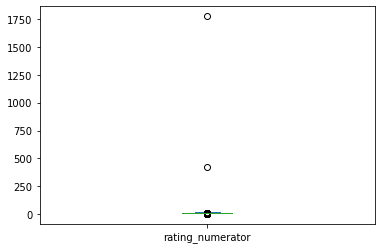

In [74]:
# Lets take a look at the boxplot of dog rating
df_master.rating_numerator.plot.box()

In [75]:
# to confirm the number outliers
df_master[df_master.rating_numerator > 20]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_source,dog_stage,jpg_url,img_num,dog_breed,p_conf,retweet_count,favorite_count
762,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,atticus,TweetDeck,NaN,NaN,NaN,NaN,NaN,2281,4791
1812,670842764863651840,2015-11-29 05:52:33+00:00,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,none,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,7592,22114


In [76]:
# lets remove the two outliers in order to get a better view of our boxplot
df_master = df_master[df_master.rating_numerator < 20]

<AxesSubplot:>

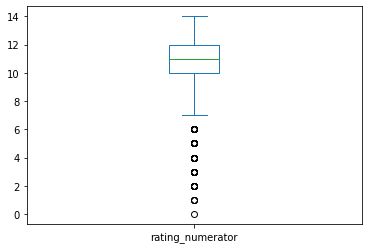

In [77]:
# Lets take a look at the boxplot of dog rating again
df_master.rating_numerator.plot.box()

### Insights:


1. Average Dog rating (numerator):

In [78]:
np.mean(df_master.rating_numerator)

10.609674017257909

2. Count of dog breed (top five) and thier averge rating

In [79]:
x = df_master.groupby('dog_breed')['rating_numerator'].mean().to_frame('avg_rating')
y = df_master.groupby('dog_breed')['dog_breed'].count().nlargest(5).to_frame('count_of_dog_breed')
y.merge(x, left_index = True, right_index = True, how='inner')

,count_of_dog_breed,avg_rating
dog_breed,,
golden_retriever,155,11.622581
Labrador_retriever,103,11.174757
Pembroke,94,11.425532
Chihuahua,90,10.533333
pug,62,10.241935


3. Average dog rating of top 10 retweet_count VS Average dog rating of top 10 favorite_count

In [80]:
a = np.mean(df_master.nlargest(10, 'retweet_count').rating_numerator)
print('Average dog rating of top 10 retweet_count: ', a)

Average dog rating of top 10 retweet_count:  12.7


In [81]:
b = np.mean(df_master.nlargest(10, 'favorite_count').rating_numerator)
print('Average dog rating of top 10 favorite_count: ', b)

Average dog rating of top 10 favorite_count:  12.9


### Visualization

<AxesSubplot:>

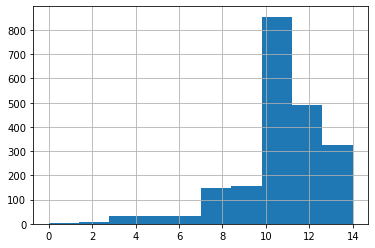

In [82]:
#lets visualize the distribution of dog rating
df_master.rating_numerator.hist()